In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

# Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

In [5]:
fashion_train.shape

(60000, 785)

In [7]:
x_train_fashion = fashion_train.drop('label',axis=1)
y_train_fashion = fashion_train['label']
x_test_fashion = fashion_test.drop('label',axis=1)
y_test_fashion = fashion_test['label']

In [9]:
# Reshaping the dataset
x_train_reshape = x_train_fashion.values.reshape(-1,28,28)
x_test_reshape = x_test_fashion.values.reshape(-1,28,28)

#Names of clothing accessories in order
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle','boot']

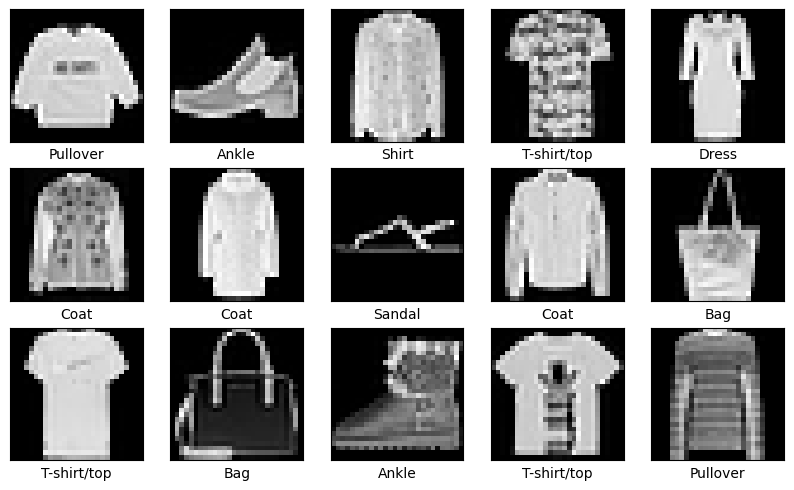

In [11]:
# Visualizing the images
plt.figure(figsize = (10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i],cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [13]:
y_train_fashion = to_categorical(y_train_fashion,num_classes=10)
y_test_fashion = to_categorical(y_test_fashion,num_classes=10)

In [15]:
# Creating base neural network
model = keras.Sequential([
    layers.Dense(128,activation='relu',input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])
# Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
# Fitting the model
history = model.fit(x_train_fashion,y_train_fashion,batch_size=100,epochs=30,validation_data=(x_test_fashion,y_test_fashion))

Epoch 1/30
600/600 [==============================] - 3s 3ms/step - loss: 1.0854 - accuracy: 0.6177 - val_loss: 0.5742 - val_accuracy: 0.7881
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.7385 - accuracy: 0.7433 - val_loss: 0.4770 - val_accuracy: 0.8379
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 0.6718 - accuracy: 0.7722 - val_loss: 0.4642 - val_accuracy: 0.8492
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.6452 - accuracy: 0.7826 - val_loss: 0.4485 - val_accuracy: 0.8435
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 0.6148 - accuracy: 0.7922 - val_loss: 0.4204 - val_accuracy: 0.8527
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.5922 - accuracy: 0.8003 - val_loss: 0.4346 - val_accuracy: 0.8602
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.5868 - accuracy: 0.8024 - val_loss: 0.4152 - val_accuracy: 0.8557
Epoch 

In [17]:
test_loss_fashion,test_acc_fashion = model.evaluate(x_test_fashion,y_test_fashion)

313/313 [==============================] - 0s 923us/step - loss: 0.3811 - accuracy: 0.8695


In [19]:
print('Fashion MNIST Test accuracy:',round(test_acc_fashion,4))

Fashion MNIST Test accuracy: 0.8695


In [21]:
# Predicting the labels-Fashion
y_predict_fash = model.predict(x_test_fashion)
y_predict_fash = np.argmax(y_predict_fash,axis = 1)
y_test_fash_eval = np.argmax(y_test_fashion,axis = 1)

313/313 [==============================] - 0s 827us/step


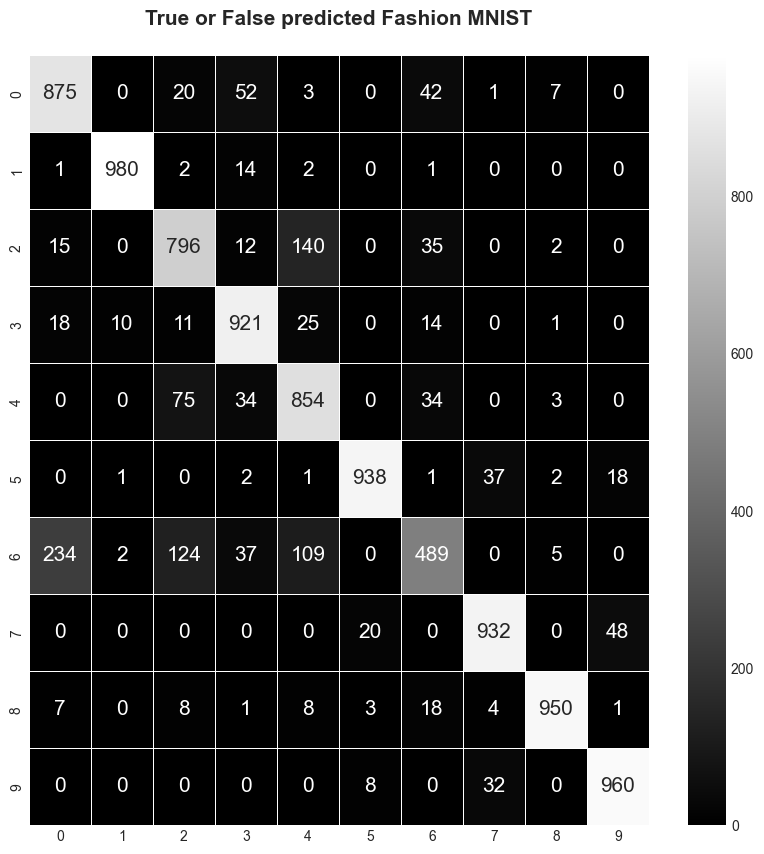

In [25]:
con_mat = confusion_matrix(y_test_fash_eval,y_predict_fash)
plt.style.use('seaborn-v0_8-dark')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1000
           1       0.99      0.98      0.98      1000
           2       0.77      0.80      0.78      1000
           3       0.86      0.92      0.89      1000
           4       0.75      0.85      0.80      1000
           5       0.97      0.94      0.95      1000
           6       0.77      0.49      0.60      1000
           7       0.93      0.93      0.93      1000
           8       0.98      0.95      0.96      1000
           9       0.93      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [31]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


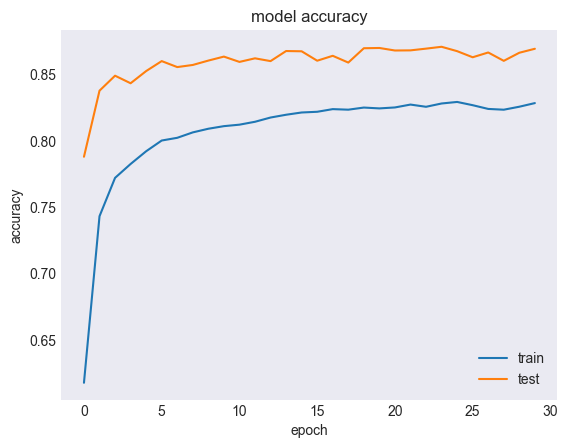

In [33]:
# Summarize history for acccuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='best')
plt.show()

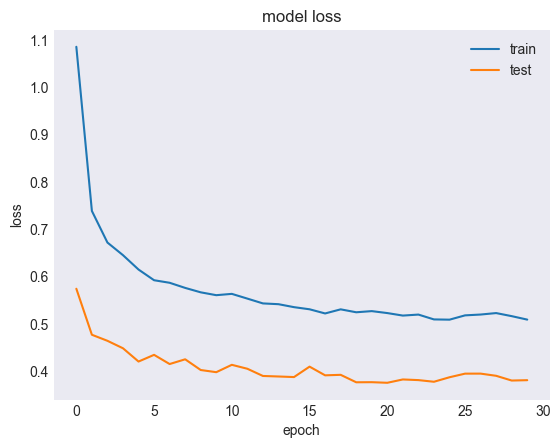

In [35]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='best')
plt.show()

In [37]:
# tf.expant_dims(x_test_digit[0])
y_predict=model.predict(x_test_fashion.loc[[0],:].values)
y_predict=np.argmax(y_predict,axis=1)
y_test_digit_eval=np.argmax(y_test_fashion,axis=1)

1/1 [==============================] - 0s 28ms/step


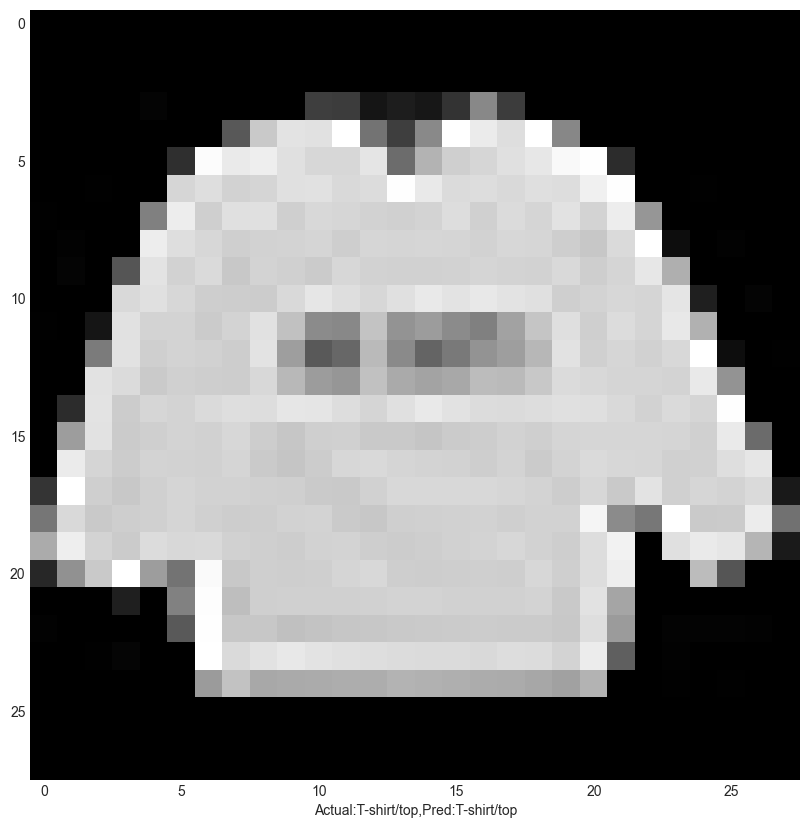

In [45]:
#Names of clothing accessories in order
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle','boot']

# Visualizing the images
plt.figure(figsize=(10,10))

plt.imshow(x_train_reshape[0],cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[0])],col_names[y_predict[0]]))
plt.show()